In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2NoZXJ5bGtvdWFkaW8vRG9jdW1lbnRzL1JlcG9zaXRvcmllcy9wZXJzb25hbC13ZWJzaXRlLzNBL2dlc3Rpb25fYWN0aWZz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1731323902.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1731323889.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1731323905.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1731323904.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1731323906.0, "/Library/Developer/CommandLineT

/var/folders/4g/2x7xwt6106l13nxqljfks4gm0000gn/T/ipykernel_15624/59611623.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
# ! pip install yfinance
from datetime import datetime, timedelta
import yfinance as yf 
import numpy as np
import pandas as pd

/Users/cherylkouadio/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
def get_data(start_date, end_date, index_ticker, tickers):
    """
    Extraction de données de cours d'actions
    Args:
        start_date (str): Date de début au format 'YYYY-MM-DD'.
        end_date (str): Date de fin au format 'YYYY-MM-DD'.

    Returns:
        dict: Contient les prix historiques des indices
    """
    # Extraction des prix historiques des composants
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust =True)['Close']

    # Extraction des prix historiques de l'indice CAC 40
    index = yf.download(index_ticker, start=start_date, end=end_date, auto_adjust =True)['Close']

    return {
        "portfolio_data": data,
        "benchmark_data": index,
    }

In [4]:
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

selected_assets = {
    "SAN.PA" : "Sanofi",
    "GLE.PA" : "Société générale",
    "HO.PA" : "Thales",
    "ENGI.PA" : "Engie",
    "CAP.PA" : "Capgemini",
    "CA.PA" : "Carrefour",
    "ORA.PA" : "Orange",
    "AC.PA" : "Accor",
    "OR.PA" : "L'Oreal",
    "ACA.PA" : "Crédit agricole"
}

index = "^FCHI"

assets_ticker  = list(selected_assets.keys())

data = get_data(start_date,end_date, index, assets_ticker)

[                       0%                       ]

[**********            20%                       ]  2 of 10 completed

[*******************   40%                       ]  4 of 10 completed

[**********************50%                       ]  5 of 10 completed

[**********************60%****                   ]  6 of 10 completed

[**********************70%*********              ]  7 of 10 completed

[**********************80%*************          ]  8 of 10 completed

[**********************90%******************     ]  9 of 10 completed

[*********************100%***********************]  10 of 10 completed

[*********************100%***********************]  1 of 1 completed

In [5]:
portfolio_data = data["portfolio_data"]
portfolio_data.head()

Ticker,AC.PA,ACA.PA,CA.PA,CAP.PA,ENGI.PA,GLE.PA,HO.PA,OR.PA,ORA.PA,SAN.PA
Date,,,,,,,,,,
2023-02-08,29.781370,9.554356,15.175895,177.961441,10.856310,23.891726,113.740334,359.421448,8.415674,81.924522
2023-02-09,29.570087,9.961541,15.267509,179.503082,10.846358,23.828888,113.931824,362.677185,8.366665,82.563179
2023-02-10,28.321592,9.850800,14.928535,176.419815,10.950842,23.564072,116.804047,359.660828,8.478687,82.100380
2023-02-13,28.753765,9.833763,14.745306,177.672379,10.887820,23.743610,119.676277,373.114624,8.490065,81.128510
2023-02-14,28.936235,9.850800,15.043054,178.202316,10.979035,23.797468,122.021919,371.295258,8.686103,81.554283


In [6]:
benchmark_data = data["benchmark_data"]
benchmark_data.head()

Ticker,^FCHI
Date,
2023-02-08,7119.830078
2023-02-09,7188.359863
2023-02-10,7129.729980
2023-02-13,7208.589844
2023-02-14,7213.810059


In [7]:
# On attribue des poids équitables pour chaque action
weights_by_asset = {ticker: 1 / len(assets_ticker) for ticker in assets_ticker}

In [8]:
aum_series = portfolio_data.apply(lambda row: sum(weights_by_asset[ticker] * row[ticker] for ticker in weights_by_asset), axis=1)
aum_series

AUM = pd.DataFrame(aum_series, columns=["AUM"])

In [9]:
AUM.head()

,AUM
Date,
2023-02-08,83.072307
2023-02-09,83.651632
2023-02-10,83.107960
2023-02-13,84.804612
2023-02-14,85.036647


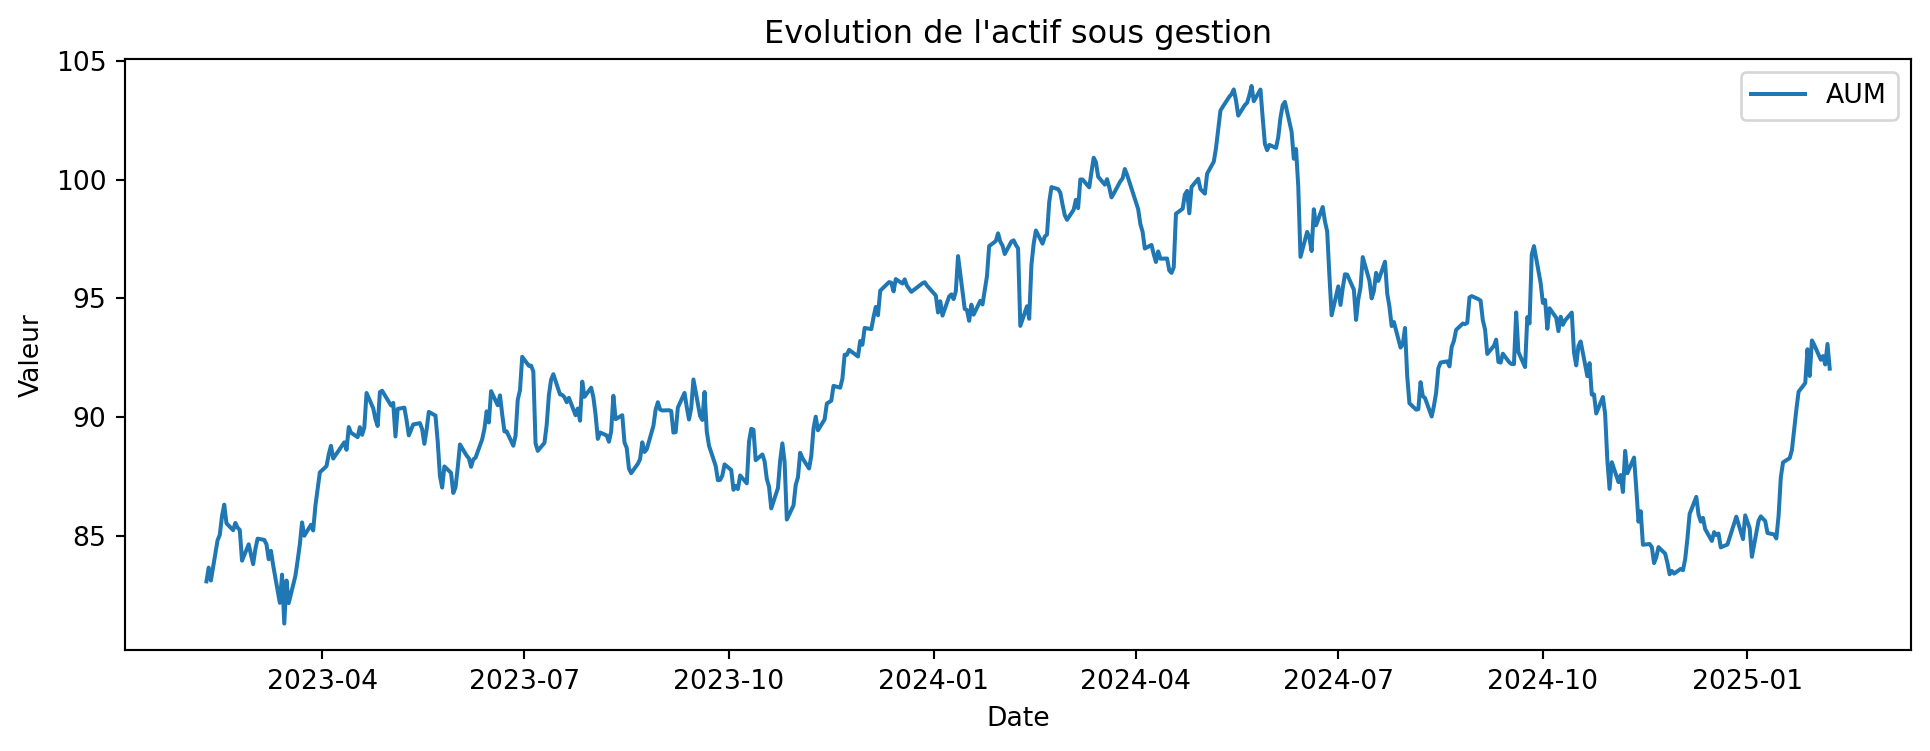

In [10]:
# Evolution de la valeur totale du portefeuille

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(AUM, label="AUM")
plt.title("Evolution de l'actif sous gestion")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.legend()

plt.show()

In [11]:
# On s'interesse aux variations/rendements de l'AUM

AUM["Variation"] = AUM["AUM"].pct_change()
AUM["Variation"].head()

Date
2023-02-08         NaN
2023-02-09    0.006974
2023-02-10   -0.006499
2023-02-13    0.020415
2023-02-14    0.002736
Name: Variation, dtype: float64

In [12]:
# Calcul de la volatilité du portefeuille
volatility_portfolio = np.std(AUM["Variation"])
annualized_volatility_portfolio = volatility_portfolio * np.sqrt(252)
print(f"Volatilité de la performance quotidienne : {volatility_portfolio : .2%}")
print(f"Volatilité de la performance annuelle : {annualized_volatility_portfolio : .2%}")

Volatilité de la performance quotidienne :  0.87%
Volatilité de la performance annuelle :  13.81%


In [13]:
# Calcul de la volatilité de l'indice CAC 40

benchmark_data["Variation"] = benchmark_data["^FCHI"].pct_change()
volatility_benchmark = np.std(benchmark_data["Variation"])
annualized_volatility_benchmark = volatility_benchmark * np.sqrt(252)

print(f"Volatilité de l'indice CAC 40 : {volatility_benchmark : .2%}")
print(f"Volatilité de l'indice CAC 40 annuelle : {annualized_volatility_benchmark : .2%}")

Volatilité de l'indice CAC 40 :  0.84%
Volatilité de l'indice CAC 40 annuelle :  13.34%


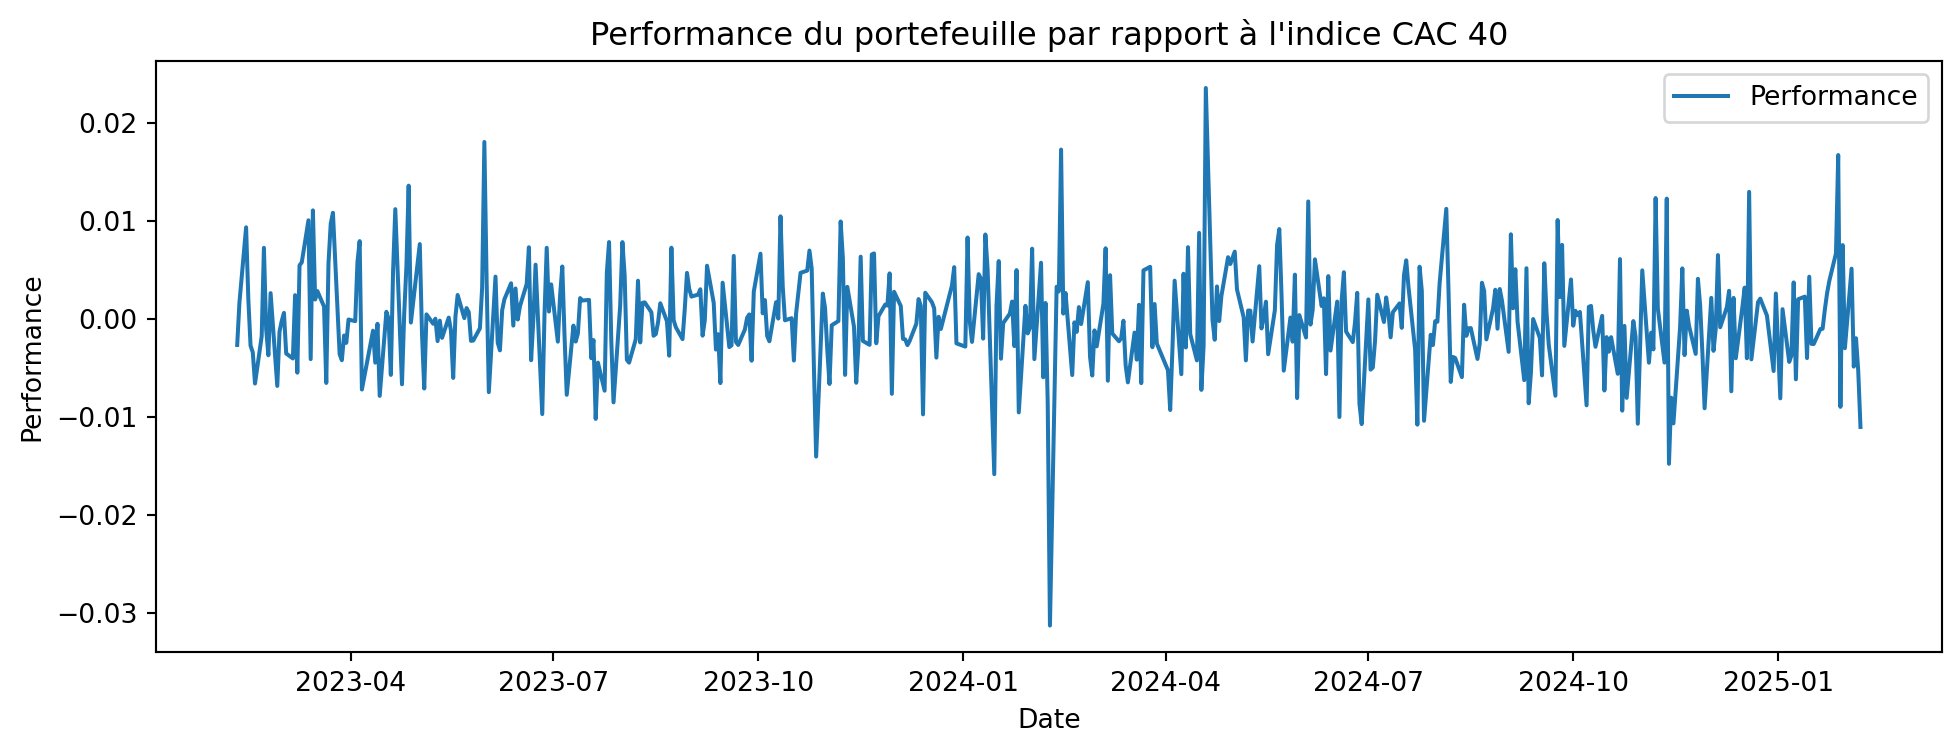

In [14]:
performance_relative = AUM["Variation"] - benchmark_data["Variation"]

plt.figure(figsize=(12, 4))
plt.plot(performance_relative, label="Performance")
plt.title("Performance du portefeuille par rapport à l'indice CAC 40")
plt.xlabel("Date")
plt.ylabel("Performance")
plt.legend()

plt.show()

In [15]:
# Calcul de la tracking error

TE = np.std(AUM["Variation"] - benchmark_data["Variation"]) 
print(f"Tracking error : {TE : .2%}")

TE_annualized = TE * np.sqrt(252)
print(f"Tracking error annualisé : {TE_annualized : .2%}")

Tracking error :  0.52%
Tracking error annualisé :  8.21%


In [16]:
# VaR historique
seuil = 99/100

VaR_hist_portfolio = np.percentile(AUM["Variation"].dropna(), 100*(1- seuil))
print(f"VaR historique sur le portefeuille : {- VaR_hist_portfolio : .2%}")
print(f"VaR historique sur 20 jours sur le portefeuille : {-VaR_hist_portfolio*np.sqrt(20) : .2%}")

print("\n","=*="*10,"\n")
VaR_hist_benchmark = np.percentile(benchmark_data["Variation"].dropna(), 100*(1 - seuil))
print(f"VaR historique sur l'indice CAC 40 : {-VaR_hist_benchmark : .2%}")
print(f"VaR historique sur 20 jours sur l'indice CAC 40 : {-VaR_hist_benchmark*np.sqrt(20) : .2%}")

VaR historique sur le portefeuille :  2.29%
VaR historique sur 20 jours sur le portefeuille :  10.23%

 =*==*==*==*==*==*==*==*==*==*= 

VaR historique sur l'indice CAC 40 :  2.13%
VaR historique sur 20 jours sur l'indice CAC 40 :  9.51%


In [17]:
# VaR paramétrique
# PnL ~ N(mu, sigma) ==> PnL = mu + sigma * Z, où Z ~ N(0,1)
# P(PnL > -VaR) = alpha <=> P(mu + sigma * Z > -VaR) = alpha <=> P(Z < (-VaR - mu) / sigma) = 1 - alpha
# Donc, -VaR = mu + sigma * quantile(1 - alpha), où quantile(1 - alpha) est le quantile de la loi normale standard

from scipy.stats import norm

mu = np.mean(AUM["Variation"].dropna())
print(f"mu sur le portefeuille : {mu : .2}")
sigma = np.std(AUM["Variation"].dropna())
print(f"sigma sur le portefeuille : {sigma : .2}")

VaR_param_portfolio  = -(mu + sigma * norm.ppf(1 - seuil))

print(f"VaR paramétrique sur le portefeuille : {VaR_param_portfolio : .2%}")
print(f"VaR paramétrique sur 20 jours sur le portefeuille : {VaR_param_portfolio * np.sqrt(20): .2%}")

print("\n","=*="*10,"\n")

mu = np.mean(benchmark_data["Variation"].dropna())
print(f"mu sur le benchmark: {mu : .2}")
sigma = np.std(benchmark_data["Variation"].dropna())
print(f"sigma sur le benchmark : {sigma : .2}")

VaR_param_benchmark  = -(mu + sigma * norm.ppf(1 - seuil))

print(f"VaR paramétrique sur le portefeuille : {VaR_param_benchmark : .2%}")
print(f"VaR paramétrique sur 20 jours sur le portefeuille : {VaR_param_benchmark * np.sqrt(20): .2%}")

mu sur le portefeuille :  0.00024
sigma sur le portefeuille :  0.0087
VaR paramétrique sur le portefeuille :  2.00%
VaR paramétrique sur 20 jours sur le portefeuille :  8.94%

 =*==*==*==*==*==*==*==*==*==*= 

mu sur le benchmark:  0.00027
sigma sur le benchmark :  0.0084
VaR paramétrique sur le portefeuille :  1.93%
VaR paramétrique sur 20 jours sur le portefeuille :  8.63%


In [18]:
performance_relative


VaR_hist_relative = np.percentile(performance_relative.dropna(), 100*(1- seuil))
print(f"VaR historique relative : {- VaR_hist_relative : .2%}")
print(f"VaR historique relative sur 20 jours : {-VaR_hist_relative*np.sqrt(20) : .2%}")

print("\n","=*="*10,"\n")

mu = np.mean(performance_relative.dropna())
print(f"mu des performances relatives: {mu : .2}")
sigma = np.std(performance_relative.dropna())
print(f"sigma des performances relatives : {sigma : .2}")

VaR_param_relative  = -(mu + sigma * norm.ppf(1 - seuil))

print(f"VaR paramétrique relative : {VaR_param_relative : .2%}")
print(f"VaR paramétrique relative sur 20 jours : {VaR_param_relative * np.sqrt(20): .2%}")

VaR historique relative :  1.08%
VaR historique relative sur 20 jours :  4.82%

 =*==*==*==*==*==*==*==*==*==*= 

mu des performances relatives: -2.7e-05
sigma des performances relatives :  0.0052
VaR paramétrique relative :  1.21%
VaR paramétrique relative sur 20 jours :  5.39%


In [19]:
# Recuperons les prix des actifs le 19/02/2020 et le 18/03/2020
# On va valoriser notre portefeuille à ces dates et calculer les performances
# A ces dates, le CAC 40 a connu de fortes pertes pendant la COVID-19
# data_1902 = get_data

start_date = pd.to_datetime("19-02-2020", dayfirst=True)
end_date = start_date + timedelta(days=1)


data_1902 = get_data(start_date,end_date, index, assets_ticker)
portfolio_data_1902=data_1902["portfolio_data"]
benchmark_data_1902=data_1902['benchmark_data']

start_date = pd.to_datetime("18-03-2020", dayfirst=True)
end_date = start_date + timedelta(days=1)


data_1803 = get_data(start_date,end_date, index, assets_ticker)
portfolio_data_1803=data_1803["portfolio_data"]
benchmark_data_1803=data_1803['benchmark_data']

# Concaténer les données des deux dates pour le portefeuille et le benchmark
portfolio_data_stress = pd.concat([portfolio_data_1902, portfolio_data_1803], ignore_index=False)
benchmark_data_stress = pd.concat([benchmark_data_1902, benchmark_data_1803], ignore_index=False)

[                       0%                       ]

[**********            20%                       ]  2 of 10 completed

[**************        30%                       ]  3 of 10 completed

[**************        30%                       ]  3 of 10 completed

[**************        30%                       ]  3 of 10 completed

[**********************70%*********              ]  7 of 10 completed

[*********************100%***********************]  10 of 10 completed

[*********************100%***********************]  1 of 1 completed

[                       0%                       ]

[                       0%                       ]

[*******************   40%                       ]  4 of 10 completed

[*******************   40%                       ]  4 of 10 completed

[**********************60%****                   ]  6 of 10 completed

[**********************80%*************          ]  8 of 10 completed

[*********************100%***********************]  10 of 10 completed

[*********************100%***********************]  1 of 1 completed

In [20]:
# Stress test covid sur le portefeuille
aum_series_stress = portfolio_data_stress.apply(lambda row: sum(weights_by_asset[ticker] * row[ticker] for ticker in weights_by_asset), axis=1)

AUM_stress = pd.DataFrame(aum_series_stress, columns=["AUM"])
AUM_stress["Variation"] = AUM_stress["AUM"].pct_change()

AUM_stress

,AUM,Variation
Date,,
2020-02-19,63.108800,NaN
2020-03-18,43.740069,-0.30691


In [21]:
benchmark_data_stress["Variation"]=benchmark_data_stress["^FCHI"].pct_change()
benchmark_data_stress

Ticker,^FCHI,Variation
Date,,
2020-02-19,6111.240234,NaN
2020-03-18,3754.840088,-0.385585
